## Map of diagnostics

This notebook compares maps of monthly diagnostics simulated by different schemes with atmospheric forcing from JRA55-do.
This example plots the January monthly mean mixed layer depth (MLD).
Panel (a) shows the map of mean MLD averaged over the 5 non-Langmuir turbulence schemes (upper color bar in m).
Panels (b)-(l) show the diﬀerences of MLD from that mean for each of the 11 schemes (lower color bar in m; positive for deeper MLD).
The color scale in both color bars are nonlinear.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.environ['GOTMWORK_ROOT']+'/tools', )
from gotmanalysis import GOTMMap
%matplotlib inline

In [2]:
# parameters
# timetag = '20090101-20090131'
timetag = '20080701-20080731'
casename = 'JRA55-do_Global_dampV5d_3h_r4'
# casename = 'COREII_Global_dampV5d_3h'
diagname = 'mld_deltaR_mean'
figformat = 'pdf'

In [3]:
# diagnostics
if diagname == 'mld_deltaR_mean':
    levels0 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 110, 130, \
               150, 180, 210, 240, 280, 320, 360, 407, 454, 500]
    cb_ticks0 = [0, 30, 60, 90, 150, 240, 360, 500]
    levels1 = [-70, -60, -50, -40, -30, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2, \
               0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70]
    cb_ticks1 = [-60, -40, -20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 40, 60]
    label_str = 'MLD (m)'
elif diagname == 'mld_deltaRp1_mean':
    levels0 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 110, 130, \
               150, 180, 210, 240, 280, 320, 360, 407, 454, 500]
    cb_ticks0 = [0, 30, 60, 90, 150, 240, 360, 500]
    levels1 = [-70, -60, -50, -40, -30, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2, \
               0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70]
    cb_ticks1 = [-60, -40, -20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 40, 60]
    label_str = 'MLD (m)'
elif diagname == 'PE_delta':
    levels0 = None
    cb_ticks0 = None
    levels1 = None
    cb_ticks1 = None
    label_str = 'PE (J m$^{-2}$)'
elif diagname == 'SST_mean':
    levels0 = list(np.arange(31))
    cb_ticks0 = None
    levels1 = list((np.arange(21)-10)*0.1)
    cb_ticks1 = None
    label_str = 'SST ($^\circ$C)'
elif diagname == 'SSS_mean':
    levels0 = None
    cb_ticks0 = None
    levels1 = None
    cb_ticks1 = None
    label_str = 'SSS (psu)'
elif diagname == 'Nsqr_mld_mean':                                                                                                                                         
    levels0 = None
    cb_ticks0 = None
    levels1 = None
    cb_ticks1 = None
    label_str = '$N^2$ (s$^-2$)'
else:
    print('Diagnostics \'{}\' not supported. Stop.'.format(diagname))

In [4]:
# check time tag
month_labels = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', \
                'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
timetag_list = ['20090101-20090131',
                '20090201-20090228',
                '20090301-20090331',
                '20090401-20090430',
                '20090501-20090531',
                '20080601-20080630',
                '20080701-20080731',
                '20080801-20080831',
                '20080901-20080930',
                '20081001-20081031',
                '20081101-20081130',
                '20081201-20081231']
try:
    idx = timetag_list.index(timetag)
except ValueError:
    print('Time tag {} not supported. Stop.'.format(timetag))
    
mlabel = month_labels[idx]

In [5]:
# paths
s1data_root = os.environ['GOTMRUN_ROOT']+'/'+casename+'/VR1m_DT600s_'+timetag
s2data_root = os.environ['GOTMFIG_ROOT']+'/data/'+casename+'/VR1m_DT600s_'+timetag
fig_root = os.environ['GOTMFIG_ROOT']+'/'+casename+'/VR1m_DT600s_'+timetag
os.makedirs(s2data_root, exist_ok=True)
os.makedirs(fig_root, exist_ok=True)

In [6]:
# lists
turbmethod_list = ['KPP-CVMix',
                   'KPP-ROMS',
                   'KPPLT-EFACTOR',
                   'KPPLT-ENTR',
                   'KPPLT-RWHGK',
                   'EPBL-RH18',
                   'EPBL-RL19',
                   'SMC',
                   'SMCLT',
#                    'K-EPSILON-SG',
                   'SMC-C01A',
                   'OSMOSIS']
legend_list = ['KPP-CVMix',
               'KPP-ROMS',
               'KPPLT-VR12',
               'KPPLT-LF17',
               'KPPLT-R16',
               'ePBL',
               'ePBL-LT',
               'SMC-KC94',
               'SMCLT-H15',
#                'k-epsilon',
               'SMC-C01A',
               'OSMOSIS']
nm = len(turbmethod_list)
irow_2col = [1, 2, 0, 1, 2, 3, 3, 4, 4, 5, 5]
icol_2col = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
labels_2col = ['(b)', '(c)', '(g)', '(h)', '(i)', '(d)', '(j)', '(e)', '(k)','(f)','(l)']
l_nlt = [True, True, False, False, False, True, False, True, False, True, False]

In [7]:
# get diagnostics
for i in np.arange(nm):
    tmname = turbmethod_list[i]
    print(tmname)
    basepath = s1data_root+'/'+tmname
    s2data_name = s2data_root+'/data_map_'+diagname+'_'+tmname+'.npz'
    # read data
    gmobj = GOTMMap().load(s2data_name)
    if i == 0:
        nloc = gmobj.lat.size
        darr = np.zeros([nm, nloc])
        lon = gmobj.lon
        lat = gmobj.lat
        name = gmobj.name
        units = gmobj.units
    darr[i,:] = gmobj.data

KPP-CVMix
KPP-ROMS
KPPLT-EFACTOR
KPPLT-ENTR
KPPLT-RWHGK
EPBL-RH18
EPBL-RL19
SMC
SMCLT
SMC-C01A
OSMOSIS


/Users/qingli/miniconda3/envs/gotm/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


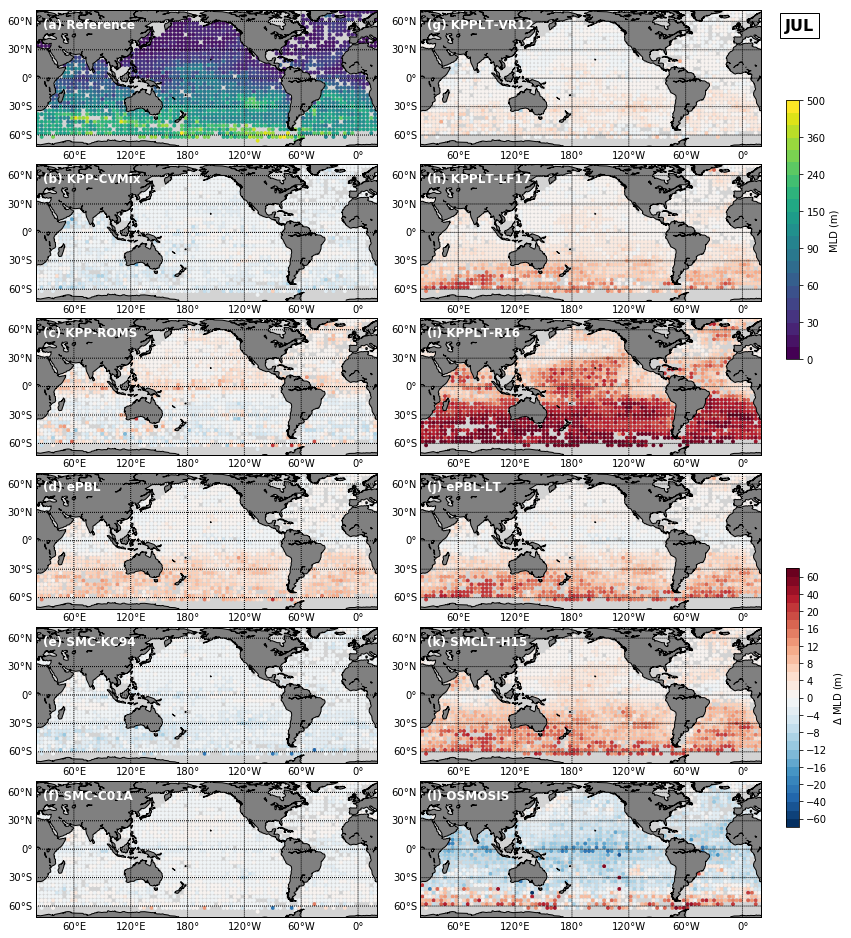

In [8]:
# create figure
nrow = (nm+2)//2
fig_width = 12
fig_height = 3+2*(nrow-1)

# plot figure
height_ratios = [1]*nrow
height_ratios.append(0.15)
width_ratios = [1, 1, 0.05]
f, axarr = plt.subplots(nrow, 2, sharex='col')
f.set_size_inches(fig_width, fig_height)

# mean of all non-Langmuir cases
gmdata_md = np.nanmean(darr[l_nlt,:], axis=0)
gmobj = GOTMMap(data=gmdata_md, lon=lon, lat=lat, name=name, units=units)
im0 = gmobj.plot(axis=axarr[0,0], levels=levels0, add_colorbar=False, cmap='viridis')
axarr[0,0].text(0.02, 0.94, '(a) Reference', transform=axarr[0,0].transAxes,
                     fontsize=12, color='white', fontweight='bold', va='top')

for i in np.arange(nm):
    # plot figure
    n = icol_2col[i]
    m = irow_2col[i]
    gmdata = darr[i,:] - gmdata_md
    gmobj = GOTMMap(data=gmdata, lon=lon, lat=lat, name=name, units=units)
    im1 = gmobj.plot(axis=axarr[m,n], levels=levels1, add_colorbar=False, cmap='RdBu_r')
    axarr[m,n].text(0.02, 0.94, labels_2col[i]+' '+legend_list[i], transform=axarr[m,n].transAxes,
                     fontsize=12, color='white', fontweight='bold', va='top')

# add month
axarr[0,1].text(1.07, 0.94, mlabel, transform=axarr[0,1].transAxes,
               fontsize=16, color='k', fontweight='bold', va='top',
               bbox=dict(boxstyle="square",ec='k',fc='w'))

# reduce margin
plt.tight_layout()

# colorbar
plt.subplots_adjust(right=0.94)
cax0 = plt.axes([0.84, 0.55, 0.1, 0.4])
cax0.set_visible(False)
cb0 = plt.colorbar(im0, ax=cax0, ticks=cb_ticks0)
cb0.formatter.set_powerlimits((-2, 3))
cb0.update_ticks()
cb0.set_label(label_str)
cax1 = plt.axes([0.84, 0.05, 0.1, 0.4])
cax1.set_visible(False)
cb1 = plt.colorbar(im1, ax=cax1, ticks=cb_ticks1)
cb1.formatter.set_powerlimits((-3, 3))
cb1.update_ticks()
cb1.set_label(r'$\Delta$ '+label_str)

# save figure
figname = fig_root+'/map_'+diagname+'_'+mlabel+'.'+figformat
plt.savefig(figname, dpi = 300)